<H2> Importing essential libraries.</H2>

In [142]:
#Importing important libraries
import pandas as pd
import json
import io
import collections
import matplotlib
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
!pip install pycountry-convert
import matplotlib.pyplot as plt
import pycountry_convert as pc
from collections import Counter
from networkx.drawing import nx_pydot
from graphviz import Source
import networkx as nx
import pydot
import graphviz
import operator
from tkinter import *
from tkinter import ttk
from IPython.display import Image
import pydotplus
import ctypes

<h2>Reading User Desired Json File.</h2>

In [143]:
#open file containing the data
filename=input("Enter file name, for eg. sample_small.json : ")
f=open(filename,'r',encoding='utf-8')
data = [json.loads(line) for line in f]

Enter file name, for eg. sample_small.json : sample_small.json


In [144]:
#Create an instance of Tkinter frame
ctypes.windll.shcore.SetProcessDpiAwareness(1)
win= Tk()
G = nx.MultiDiGraph()
#Set the geometry of Tkinter frame
win.geometry("2000x700")

''

In [145]:
dataFrame=data.copy()
frequency=[]
cont= {}

In [146]:
#function that plots graph
def graph_freq(arr):
    plt.Figure(figsize=(15,8),dpi=100)
    plt.bar(range(len(arr.values())), arr.values(), align='center')
    plt.xticks(range(len(arr.keys())), arr.keys(), size='small', rotation=90)
    plt.style.use('ggplot')
    plt.show()

<h1>Question 2a, Views by Country </h1>

In [147]:
#function to draw a histogram of countries of visitors
def search(uid,value=0):
    str =[]
    for i in range(len(data)):
        if(data[i].get("subject_doc_id")==uid):
            str.append(data[i]["visitor_country"])
        frequency = collections.Counter(str)

    

    if (value ==0):
        graph_freq(frequency)
    
    return frequency

<h1>Question 2b, Views by Continent </h1>

In [148]:
#function to draw a histogram of continents of visitors
def continent(uid):
    cont={}
    freq=dict(search(uid,1))
    for key, value in freq.items() :
        continent_name = pc.country_alpha2_to_continent_code(key)
        cont[continent_name]=value
    graph_freq(cont)

<h6> function for Question 3

In [149]:
def getData(key,n):
    #instance variables
    datas=[]
    dataActual=''
    res=''
    counts=[]
    dataFrame=data.copy()
    
    #adding unique datas in a list
    for i in range(len(dataFrame)):
        try:
            dataActual=dataFrame[i][key]
            if n==1:
                dataActual=dataActual[0:dataActual.find("/")]
            res=dataActual in datas
            if res==False:
                datas.append(dataActual)
        except KeyError:
            continue
    #initialising counts list
    for i in range(len(datas)):
        counts.append(0)
    
    #adding counts to the datas
    for i in range(len(dataFrame)):
        try:
            dataActual=dataFrame[i][key]
            if n==1:
                dataActual=dataActual[0:dataActual.find("/")]
            for j in range(len(datas)):
                if datas[j]==dataActual:
                    counts[j]=counts[j]+1
        except KeyError:
            continue
    return datas,counts

<h1> Question 3a, Views by Browser (using full path names)</h1>

In [150]:
#histogram of browsers used and their count(frequency), 
#where keys(values on x-axis) are full path names of 'visitor_useragent'
#NOT SHOWN IN GUI, as keys are not readable due to massive length and it is commented for better performace uncomment to test

#gets browsers and their respective counts from getData() function
#browsers,counts=getData('visitor_useragent',0)
#plt.bar(list(browsers), counts, color='g')
#plt.show()

<h1>Question 3b, Views by Browser (using only browser names)

In [151]:
#function to draw a histogram of browsers used and their count (freuency), 
#where keys(values on x-axis) are only browser names eg Mozilla
#OUTPUT SHOWN IN GUI
def viewByBrowser():
    #gets browsers and their respective counts from getData() function
    browsers,counts=getData('visitor_useragent',1)
    
    #making a dictionary with browsers and their counts
    browserCount={browsers[i]: counts[i] for i in range(len(browsers))}


    plt.bar(list(browsers), counts, color='g')
    plt.show()

<h1> Question 4, Top 10 Readers

In [152]:
#function to list the top 10 readers of the documents
def top_readers():
    #gets readers and their respective counts from getData() function
    readers, counts = getData('visitor_uuid',0)
            
    #sorting the counts (pages read) in dscending order
    sortedCounts=counts.copy()
    sortedCounts.sort(reverse=True)

    #extracting highest 10 pages
    top10readers=sortedCounts[0:10]

    #extracting associated readers (visitor_uuid) of highest 10 pages read
    top10ReaderID=[]
    for i in range(len(top10readers)):
        for j in range(len(counts)):
            if top10readers[i]==counts[j]:
                top10ReaderID.append(readers[j])
            

    #in case the (10 + n)th count is equal to 10th count           
    if len(top10ReaderID)>10:
        top10ReaderID=top10ReaderID[0:10]
    

    #creating a dictionary of top 10 reader ID's and pages read
    top10ReadersDict={top10ReaderID[i]: top10readers[i] for i in range(len(top10readers))}

    return top10ReadersDict

<h1> Question 5a

In [153]:
#function to return the list of readers for a document uuid
def readers(uid):
  str =[]
  for i in range(len(data)):
    if(data[i].get("subject_doc_id")==uid):
     str.append(data[i]["visitor_uuid"])
  str = list(dict.fromkeys(str)) #removing duplicates
  return str

<h1> Question 5b

In [154]:
#function to return the list of documents read by a user using visitor uuid
def documents(uid):
  str =[]
  for i in range(len(data)):
    if(data[i].get("visitor_uuid")==uid):
      if(data[i].get("subject_doc_id") != None):
       str.append(data[i].get("subject_doc_id"))
  str = list(dict.fromkeys(str)) #removing duplicates
  return str

<h1> Question 5c

In [155]:
#function to return the list of documents that the other readers like based on document uuid
def also_like(doc_id):
    str = readers(doc_id)
    doc_list=[]
    for i in range(len(str)):
        doc_list+=documents(str[i])
    return doc_list

<h1> Question 5c, sorting function

In [156]:
#function to sort the list of also like based on highest count
def sort_list(list,org):
    
    counts = dict(Counter(list))
    counted_list = {key:value for key, value in counts.items() if key != None and key != org}
    top=[]
    i=0
    for key, value in counted_list.items():
        if i<10:
            top.append(key)
            i=i+1
        else:
            break

    return top

<h1> Question 5d, sorting function
    

In [157]:
#function to sort the list of also like based on highest count including the original doc
def sort_w_org(list):
    counts = dict(Counter(list))
    counted_list = {key:value for key, value in counts.items() if key != None}
    top10=[]
    i=0
    for key, value in counted_list.items():
        if i<10:
            top10.append(key)
            i=i+1
        else:
            break

    return top10

<h1> Question 6

In [158]:
#function to draw the dot graph for the readers with the also like documents 
def draw_graph(doc_id):
    docIDs = also_like(doc_id)
    sorted_l=sort_w_org(docIDs)

  
    for key in sorted_l:
        reader_list=readers(key)
        for k in range(len(reader_list)):
            G.add_edge(reader_list[k][-4:],key[-4:])

    nx_pydot.write_dot(G, 'multig.dot')

<h1> Question 7, GUI Designing

<h6>function to grab text from text box

In [159]:
#function to grab text from text box
def take_text():
    global entry
    string= entry.get()
    return string

<h6>function that is activated when pressing Graph by Country button. Plots a graph of country views

In [160]:
#function that is activated when pressing Graph by Country button
def countries():
    str=take_text()
    search(str)

<h6>function that is activated when pressing Graph by Continent button. Plots a graph by continent views 

In [161]:
#function that is activated when pressing Graph by Continent button   
def cont_com():
    str=take_text()
    continent(str)

<h6> function that is activated when pressing Also Like button. Shows document uuid's which were also read by users
    who read the document specified in the textbox.

In [162]:
#function that is activated when pressing Also Like button  
def also_like_com():
    str=take_text()
    doc_list=also_like(str)
    sorted_list = sort_list(doc_list,str)
    textbox = Text(win, height=15, width=46)  
    textbox.insert(1.0,sorted_list)
    textbox.grid(columnspan=4,column=0,row=5)

<h6>function that is activated when pressing Top 10 Readers button. Shows the top 10 visitor uuid's of visitors who read the most number of documents, and the number of documents they read.

In [163]:
#function that is activated when pressing Top 10 Readers button  
def top_readers_list():
    readers_list= top_readers()
    if filename=='sample_tiny.json' or filename=='sample_small.json':
        textbox = Text(win, height=15, width=24)
    else:
        textbox = Text(win, height=15, width=25)
    textbox = Text(win, height=15, width=24)  
    textbox.insert(1.0,readers_list)
    textbox.grid(columnspan=4,column=3,row=5)

<h6>function that is activated when pressing Also Like Graph button. Generates an "also-like" graph (explained in report) in your computers picture viewer

In [164]:
#function that is activated when pressing Also Like Graph button      
def also_like_graph():
    str=take_text()
    G.clear()
    draw_graph(str)

    s=Source.from_file('multig.dot')
    s.render('multig.gv', format='ps',view=False)
    s.render('multig', format='png',view=True)

<h6>Adds a label with text beside the textbox in which user enters document uuid input

In [165]:
#Initialize a Label to display the User Input
label=Label(win, text="Enter Document UUID :", font=("Courier 16 bold"))
label.grid(column=0,row=0)

<h6>Creation of an entry widget, which is esentially a textbox for user to enter an input

In [166]:
#Create an Entry widget to accept User Input
entry= Entry(win, width= 60)
entry.focus_set()
entry.grid(columnspan=4,column=1,row=0)

<h6> Setting the positions of the label, textbox and buttons. Uses a grid layout to show tabular format

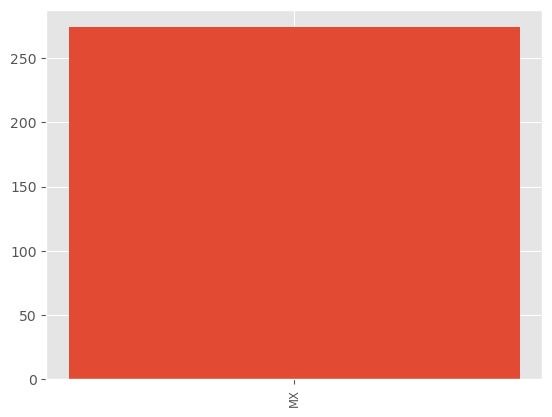

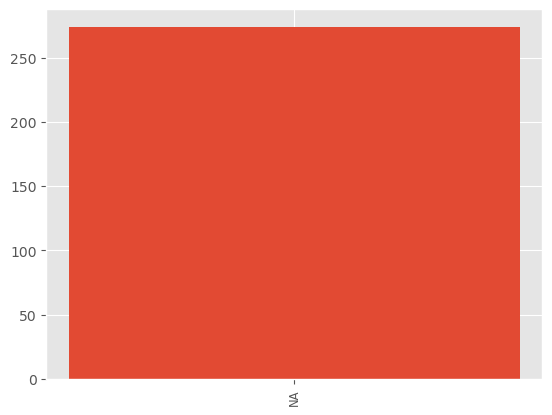

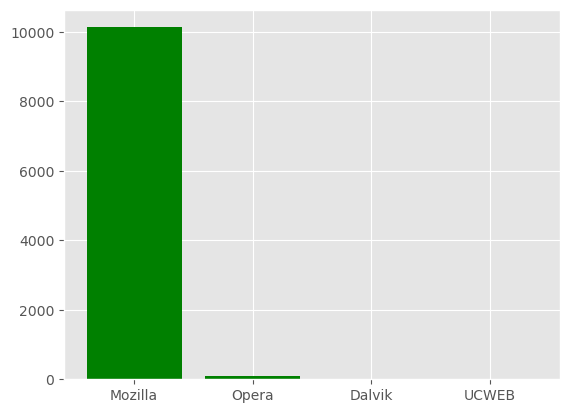

In [167]:
#Creating Buttons for different functionalities
ttk.Button(win, text= "Graph by Country",width= 20, command= countries).grid(column=0,row=3)
ttk.Button(win, text= "Graph by Continent",width= 20, command= cont_com).grid(column=1,row=3)
ttk.Button(win, text= "View By Browser",width= 20, command= viewByBrowser).grid(column=2,row=3)
ttk.Button(win, text= "Also Like",width= 20, command= also_like_com).grid(column=0,row=4)
ttk.Button(win, text= "Also Like Graph",width= 20, command= also_like_graph).grid(column=1,row=4)
ttk.Button(win, text= "Top 10 readers",width= 20, command= top_readers_list).grid(column=2,row=4)
canvas = Canvas(win, height=200)
canvas.grid(columnspan=7)


win.mainloop()
